### This program should utilize the Thomas-Fermi potential for an ion in the Schrodinger equation to obtain energy levels and radial wave functions 

In [553]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import linalg
import scipy.integrate as integrate

In [554]:
# constants 
Z = 10 # actual nuclear charge
e = -1 # -1.60217662E-19  electric charge [C]
Ne = 10 # frozen electrons
# hbar = 1.0545718E-34 # reduced plank's constant [J*s]
# m_e = 9.10938356E-31 # mass of electron [kg]
a0 = 0.529 # hbar**2 / (m_e * e**2) bohr radius 
a = 37./65. 
A = 29.7123
B = 226.2770
l = 1 # orbital angular momentum of active electron

In [555]:
# Set up radial grid
n = 2000 # number of grid points
dims = n - 1 
r_min = 0 # min radial distance [a0]
r_max = 50. # max radial distance [a0]
delta_r = (r_max - r_min) / n

r_grid = np.linspace(r_min + delta_r, r_max - delta_r, dims)
# r_prime = r_grid / np.array()

# l = 0 # orbital quantum number 
# M = 1 * 1.66E-27  # mass of H [kg]
# mu = (me * M) / (me + M)

In [556]:
# mu* (Amaldi) 
first = (9. * np.pi**2) / (2. * Z) # first term in ustar
second = Ne / (Ne - 1) # second term in ustar
ustar = (1./4.) * first**(1./3.) * second**(2./3.) # amaldi correction

In [557]:
q = (Z - Ne) / Z

if q < 0.0325:
    gamma0 = (-3./2.) * (1 - np.sqrt(1 + (20./(9. * (q + 1./Z)))))
else:
    gamma0 = a * (A - np.sqrt(A**2 + B * np.log(q + 1./Z)))

In [558]:
# Screening function, psi(x)
# x0 = gamma0 / a # ionic atomic radius 
# r0 = x0 * ustar #/ 5.29E-11  m to a0
# r = np.linspace(0,r0,num=200) # ionic atomic radius 
# x = r / ustar 
def screening(r):
    x0 = gamma0 / a 
    x = r / ustar
    if x > x0:
        return 0
    else:
        psi_1 = (1. / (1. + a * x)**2)
        psi_2 = 1. - ((1. + a * x) / (1. + gamma0))**5
        return psi_1 * psi_2

In [559]:
def V(r, psix, l):
    x0 = gamma0 / a 
    r0 = x0 * ustar 
    v0 = (Z - Ne) * e / r0 
    if r <= r0:
        tf = (((Z * e) / r) * psix) + v0 
    else:
        tf = (Z - Ne) * e / r
    # coulomb = Z * e / r 
    centrifugal = (l * (l + 1)) / r**2
    return centrifugal + tf

In [560]:
# make hamiltonian matrix
h = np.zeros((dims, dims),float)

# H_iplus1 = -hbar**2 / (2 * mu * dr**2)
# H_i = hbar**2 / (mu * dr**2) + calc_V(r_grid)

#fill matrix
for i in range(len(h)-1): #lenh-1 
    h[i,i+1] = h[i+1,i] = -0.5 / delta_r**2  # off diags

screening_pots = []
# s_waves = []
# p_waves = []
# d_waves = []
# wfns = {} # dict for storing wave functions by n 
# n_max = 3  # Maximum principal quantum number
# l_max = n_max - 1  # Maximum angular momentum quantum number

for i in range(len(h)):
    # for l in range(3):
    potential = V(r_grid[i], screening(r_grid[i]), l)
    screening_pots.append(potential)
        # if l == 0:
        #     s_wave = s_waves.append(potential)
        # if l == 1:
        #     p_wave = p_waves.append(potential)
        # if l == 2:
        #     d_wave = d_waves.append(potential)
    h[i,i] = (1. / delta_r**2) + potential # center diag



In [561]:
# calc eigenvalues and vectors
eigenvals, eigenvectors = linalg.eigh(h)

In [562]:
# density calc for Ne electrons 
def calc_density(r, psix):
    x = r / ustar 
    rho = (Z / (4 * np.pi * ustar * 3)) * (Ne / (Ne - 1)) * (psix / x)**(3/2)
    return rho

In [563]:
def total_energy(r):
    # constants 
    kappa_k = 2.871
    # kappa_e = 0.7386

    # potentials 
    v_nuc = Z / abs(r)

    # functions 
    psix_function = lambda x: screening(x)
    rho_function = lambda x: (Z / (4 * np.pi * ustar * 3)) * (Ne / (Ne - 1)) * (psix_function(x) / (r / ustar))**(3/2)
    kinetic_integrand = lambda x: rho_function(x)**(5/3)
    potential_integrand = lambda x: rho_function(x) * v_nuc
    # weizsacker_integrand = lambda x: rho_function(x)**(4/3)

    # energy calcs
    kinetic_E, _ = integrate.quad(kinetic_integrand, 0, 50) # , _ ignores the error estimate. Could also read result,error = 
    potential_E, _ = integrate.quad(potential_integrand, 0, 50)
    # weizsacker_corr, _ = integrate.quad(weizsacker_integrand, 0, 50)

    # total energy 
    total_E = (kappa_k * kinetic_E) - potential_E 

    return total_E

In [570]:
# calculating total energy for each value in the r_grid 
total_energies = []

for r_value in r_grid:
    screening_value = screening(r_value)
    density_value = calc_density(r_value, screening_value)
    total_E = total_energy(r_value)
    total_energies.append(total_E)

print(r_grid[0])
print(total_energies[0])
print(total_energies[0]/Z**(7/3))
# print(len(total_energies))

0.025
-6978.634586213241
-32.391952369231305


In [565]:
# Z = [10, 18, 36, 54, 86]
# E = [31.9203, 18.4003, 9.9977, 7.0801, 4.7833]



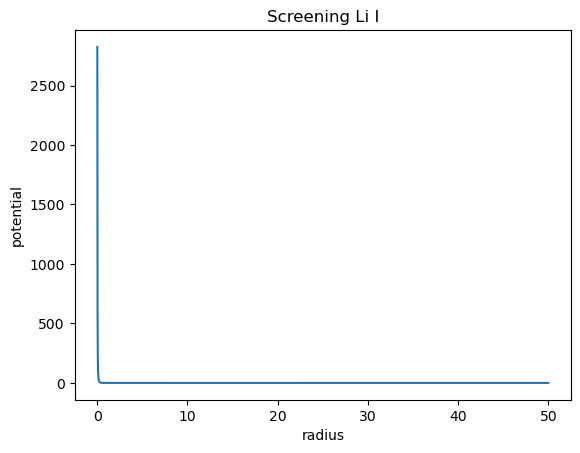

In [566]:
# plt.plot(r_grid, np.transpose(s_waves), label='s')
# plt.plot(r_grid, np.transpose(p_waves), label='p')
# plt.plot(r_grid, np.transpose(d_waves), label='d')
plt.plot(r_grid, np.transpose(screening_pots))
# plt.legend()
# plt.xlim(0,5)
# plt.ylim(-1,0)
plt.xlabel('radius')
plt.ylabel('potential')
plt.title('Screening Li I')
plt.show()


m =  0 , n =  2 , l =  1 , energy [au] = 0.005435427730180644 , 1/energy = 183.97816135930216
m =  1 , n =  3 , l =  1 , energy [au] = 0.0144440682320712 , 1/energy = 69.23257242579541
m =  2 , n =  4 , l =  1 , energy [au] = 0.027357057712236604 , 1/energy = 36.55363857176452
m =  3 , n =  5 , l =  1 , energy [au] = 0.04413018585342753 , 1/energy = 22.66022634306063


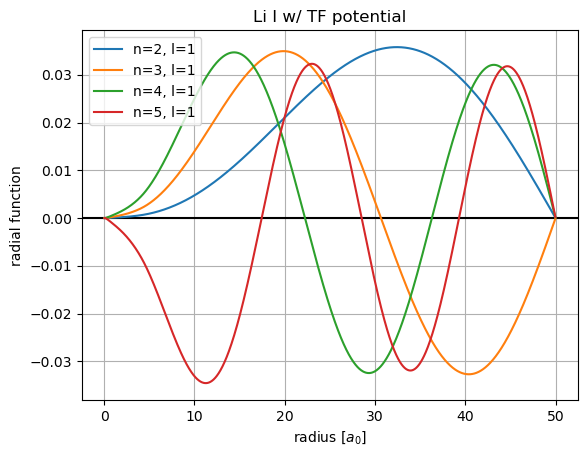

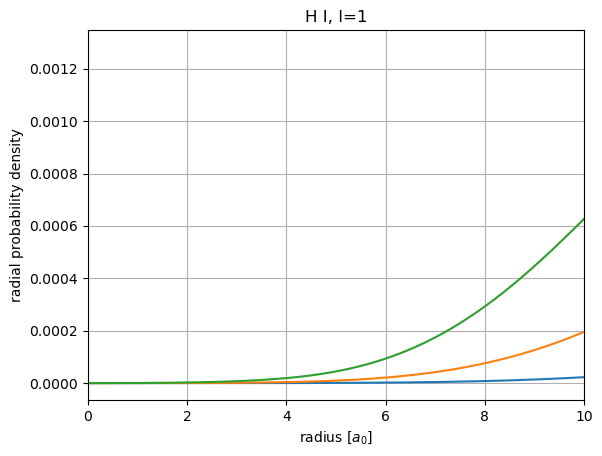

In [567]:
# plot radial function
plt.xlabel('radius [$a_0$]')
plt.ylabel('radial function')
plt.title(f'Li I w/ TF potential')
plt.grid(True)
# plt.xlim(0)
plt.axhline(0, color='black')


# l=1
# calc radial function  
for m in range(4):
    radial_func = np.transpose(eigenvectors)[m]
    n = m + 1 + l
    plt.plot(r_grid, radial_func, label=f'n={n}, l={l}')
    print('m = ',m, ', n = ',n , ', l = ', l, ', energy [au] =', eigenvals[m], ', 1/energy =', 1/eigenvals[m])
    # energyev = eigenvals[m] * 27.2114
    # absev = -27.2114 * 0.5 / n**2
    # dif = abs((energyev - absev)/absev)*100
    # print ('energy [eV]=', energyev, ', actual=', absev, ', difference(%)=', dif)
plt.legend()
plt.show()

# plot radial probability density
plt.xlabel('radius [$a_0$]')
plt.ylabel('radial probability density')
plt.title(f'H I, l={l}')
plt.grid(True)
plt.xlim(0,10)

#calc probability density
for m in range(3):
    prob_den = np.transpose(eigenvectors)[m]**2
    plt.plot(r_grid, prob_den)
plt.show()